In [1]:
import numpy as np
from collections import Counter
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
import math
import pydotplus

from sklearn import preprocessing
from sklearn import tree
from pprint import pprint
%matplotlib inline
#from io import StringIO

In [2]:
e=[];values={};currentattribute=None
remainingigattributes=[]
stop=False
df=pd.read_csv('playtennis.csv')

attribute_names=list(df.columns)
print("list of attributes : ",attribute_names)


print("\n input data set is :\n",df)

attribute_names.remove(df.keys()[-1])
print("predecting attribute",attribute_names)
remainingigattributes=attribute_names

total_attr=len(attribute_names)
print('total no of attributes ',total_attr)

t=df.keys()[-1]
print(t)

def entropy(probs):
    return sum([-prob*math.log(prob,2) for prob in probs])

list of attributes :  ['outlook', 'temperature', 'humidity', 'wind', 'play']

 input data set is :
      outlook temperature humidity    wind play
0      sunny         hot     high    weak   no
1      sunny         hot     high  strong   no
2   overcast         hot     high    weak  yes
3       rain        mild     high    weak  yes
4       rain        cool   normal    weak  yes
5       rain        cool   normal  strong   no
6   overcast        cool   normal  strong  yes
7      sunny        mild     high    weak   no
8      sunny        cool   normal    weak  yes
9       rain        mild   normal    weak  yes
10     sunny        mild   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
13      rain        mild     high  strong   no
predecting attribute ['outlook', 'temperature', 'humidity', 'wind']
total no of attributes  4
play


In [3]:
def entropy_of_list(ls,value):
    cnt=Counter(x for x in ls)
    print('count=',cnt)
    print('count keys=',cnt.keys())
    global stop
    print('count values=',len(cnt.values()))
    total_instances=len(ls)*1.0
    print("current attribute is ",currentattribute)
    if currentattribute  is not None and currentattribute  in values.keys() and stop is not True:
        if value not in values[currentattribute]:
            values[currentattribute][value]={}
            for i in range(len(cnt.values())):
                
                if list(cnt.keys())[i] not in values[currentattribute][value]:
                    values[currentattribute][value][list(cnt.keys())[i]]=list(cnt.values())[i]
            #pass
        #pass
       # values[currentattribute].append({list(cnt.keys())[1]:list(cnt.values())[1]})
    print("no of instances of current sub class is {0}".format(total_instances))
    probs=[x/total_instances for x in cnt.values()]
    print("classes:",min(cnt)," ",max(cnt))
    print("probability of class {0} is : {1:.4f}".format(min(cnt),min(probs)))
    print("probability of class {0} is : {1:.4f}".format(max(cnt),max(probs)))
    return entropy(probs)

In [4]:
print("\n Input dataset for entropy calculation :\n",df[t])
total_entropy=entropy_of_list(df[t],'s')
print("\n Total Entropy of {0} Data set :{1:.4f}".format(t,total_entropy))
#print(e)


 Input dataset for entropy calculation :
 0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object
count= Counter({'yes': 9, 'no': 5})
count keys= dict_keys(['no', 'yes'])
count values= 2
current attribute is  None
no of instances of current sub class is 14.0
classes: no   yes
probability of class no is : 0.3571
probability of class yes is : 0.6429

 Total Entropy of play Data set :0.9403


In [5]:
def information_gain(df,split_attribute,target_attribute):
    print("\n---- Information Gain calculation of ",split_attribute,"-------")
    df_split=df.groupby(split_attribute)
    glist=[]
    for gname,group in df_split:
        glist.append(gname)
    for name,group in df_split:
        print(" attribute value based on which data is grouped : ",name)
        print("grouped attribute values \n",group)
    nobs=len(df.index)
    glist.reverse()
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x,glist.pop())})
    df_agg2=df_split.agg({target_attribute:lambda x:len(x)/nobs})
    #print(df_agg_ent)
    df_agg1.columns=['entropy']
    df_agg2.columns=['proportions']
    new_entropy=sum(df_agg1['entropy']*df_agg2['proportions'])
    old_entropy=entropy_of_list(df[target_attribute],'S')
    return old_entropy-new_entropy,df_agg1['entropy']

In [6]:

def id3(df,target_attribute,attribute_names,default_class=None):
    
    
    cnt=Counter(x for x in df[target_attribute])
    global currentattribute
    global remainingigattributes
    global values
    global stop
    if len(cnt)==1:
        return next(iter(cnt))
    elif df.empty or (not attribute_names):
        return default_class
    else:
        default_class=max(cnt.keys())
        gainz=[]
        for attr in attribute_names:
            currentattribute=attr
            if attr in remainingigattributes and attr not in values.keys():
                values[currentattribute]={}
            ig,a=information_gain(df,attr,target_attribute)
            #if attr not in values:
            if attr in remainingigattributes:
                
                values[currentattribute]['ig']=round(ig,2)
            gainz.append(ig)
            e.append(a)
            print(attr,' : ',ig)
        index_of_max=gainz.index(max(gainz))
        best_attr=attribute_names[index_of_max]
        print("attribute with maximum gain: ",best_attr)
        tree={best_attr:{}}
        remainingigattributes.remove(best_attr)
        print(values)
        stop=True
        remaining_attribute_names=[i for i in attribute_names if i!=best_attr]
        for attr_val,data_subset in df.groupby(best_attr):
            subtree=id3(data_subset,target_attribute,remaining_attribute_names,default_class)
            tree[best_attr][attr_val]=subtree
        return tree


In [7]:
attribute_names=list(df.columns)

attribute_names.remove(df.keys()[-1])
tree1=id3(df,t,attribute_names)
print("\n the resultant decision tree is :\n")
pprint(tree1)


---- Information Gain calculation of  outlook -------
 attribute value based on which data is grouped :  overcast
grouped attribute values 
      outlook temperature humidity    wind play
2   overcast         hot     high    weak  yes
6   overcast        cool   normal  strong  yes
11  overcast        mild     high  strong  yes
12  overcast         hot   normal    weak  yes
 attribute value based on which data is grouped :  rain
grouped attribute values 
    outlook temperature humidity    wind play
3     rain        mild     high    weak  yes
4     rain        cool   normal    weak  yes
5     rain        cool   normal  strong   no
9     rain        mild   normal    weak  yes
13    rain        mild     high  strong   no
 attribute value based on which data is grouped :  sunny
grouped attribute values 
    outlook temperature humidity    wind play
0    sunny         hot     high    weak   no
1    sunny         hot     high  strong   no
7    sunny        mild     high    weak   no
8    s

In [8]:
level=0
parent=0

In [9]:
x=''''''

In [10]:
def generatestr(tree,node,method,parentlevel=parent):
    #for i in range(len(tree.keys())):
    global x
    global level
    global parent
    level=level+1
    #node=list(tree.keys())[i]
    
    
    #x=x+'''%d [label=<%s>, fillcolor="#e5813900"] ;'''%(parentlevel,node)
    if isinstance(tree[node],str):
        
        colorcode="#399de571"
        if tree[node]=='no':
            colorcode='#FF0000'
        else:
            colorcode="#008000"
        x=x+''' %d [label=<%s> fillcolor="%s"] ;'''%(parentlevel,tree[node],colorcode)
        
    elif isinstance(tree[node],dict):
        
        if method=="odd":
            x=x+''' %d [label=<%s<br/>'''%(parentlevel,node)
            for i in values[node]:
                if not isinstance(values[node][i],dict):
                    x=x+'''%s=%s'''%('ig',values[node][i])
                else:
                    x=x+'''%s'''%(i)
                    x=x+"["
                    for j in range(len(values[node][i])):
                        x=x+'''%s,'''%(list(values[node][i].values())[j])
                    x=x+"]<br/>"
            x=x+'''>fillcolor="#399de571"] ;'''
            for i in range(len(tree[node])):
                x=x+'''%d -> %d [labeldistance=2.5, labelangle=45, headlabel="%s"] ;'''%(parentlevel,parent+1,list(tree[node])[i])
                generatestr(tree[node],list(tree[node].keys())[i],"even",parent+1)
                parent=parent+1
        else:
            x=x+''' %d [label=<%s> fillcolor="#399de5ff"] ;'''%(parentlevel,list(tree[node].values())[0])
            h=tree[node]
            parent=parentlevel
            generatestr(h,list(tree[node].keys())[0],"odd",parent)
    

In [11]:
rootnode=list(tree1.keys())[0]

x='''digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica];'''
generatestr(tree1,rootnode,"odd",parent)
p=""
x=x+"}"
parent=0
level=0

In [12]:
def plot():
    graph = pydotplus.graph_from_dot_data(x)  
    return Image(graph.create_png())

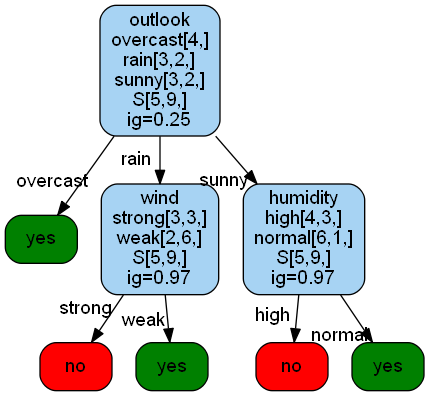

In [13]:
plot()